In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "employment_by occupation & industry.csv"
df = pd.read_csv(path)

df["employment"] = pd.to_numeric(df["employment"], errors="coerce")
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# drop incomplete rows
df = df.dropna(subset=["occupation", "industry", "year", "employment"])

# rows to exclude
bad_occ = df["occupation"]=="All Occupation Groups, (Total Employed Residents)"

bad_ind = df["industry"]=="All Industries"

bad_services = df["industry"]=="Services" 
# final cleaned table 
df_clean = df.loc[~(bad_occ | bad_ind | bad_services)].reset_index(drop=True)

Hiring Volume by Industry — 2024
                                       industry  employment
15                     Wholesale & Retail Trade       336.2
12   Public Administration & Education Services       305.7
4                Financial & Insurance Services       239.5
7                                 Manufacturing       212.1
14                     Transportation & Storage       197.8
11                        Professional Services       197.1
5                      Health & Social Services       174.5
0                 Accommodation & Food Services       147.5
6                  Information & Communications       139.3
1             Administrative & Support Services       124.0
3                                  Construction       102.9
8   Other Community, Social & Personal Services        73.0
10                  Other Occupation Groups Nes        57.4
13                         Real Estate Services        56.3
2              Arts, Entertainment & Recreation        37.8
9      

C:\Users\15316\AppData\Local\Temp\ipykernel_30196\2573232097.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(by_industry_2024["industry"], rotation=75, ha="right", fontsize=8)


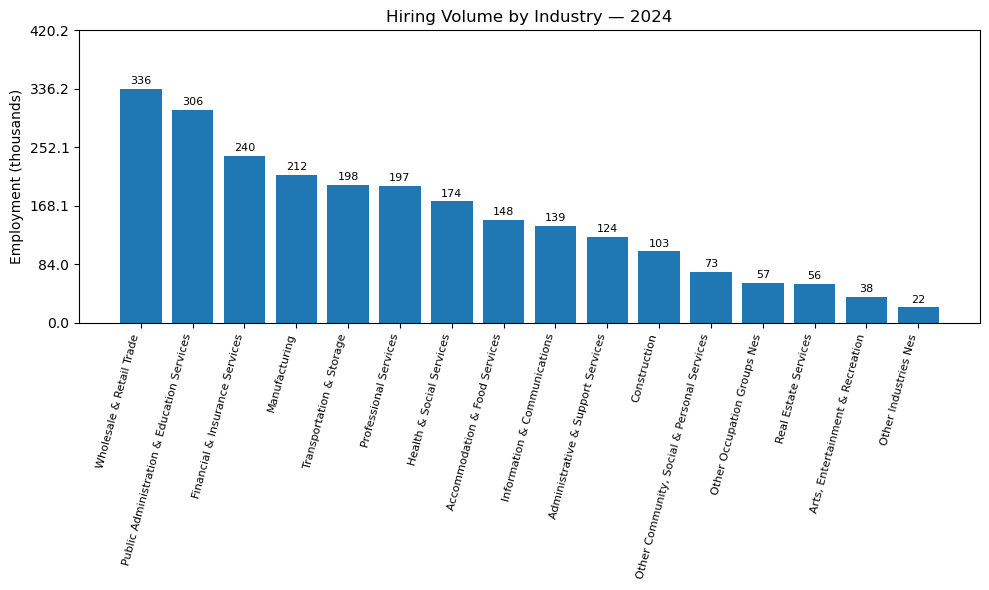

In [2]:

df_clean = df_clean[df_clean["year"] == 2024].copy()

by_industry_2024 = (df_clean.groupby("industry", as_index=False)["employment"]
                             .sum()
                             .sort_values("employment", ascending=False))

print("Hiring Volume by Industry — 2024")
print(by_industry_2024)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(by_industry_2024["industry"], by_industry_2024["employment"])
ax.bar_label(bars, fmt='{:,.0f}', padding=2, fontsize=8)

ax.set_title("Hiring Volume by Industry — 2024")
ax.set_ylabel("Employment (thousands)")
ymax =by_industry_2024["employment"].max()
upper = ymax * 1.25 
ax.set_ylim(0, upper)
ax.set_yticks(np.linspace(0, upper, 6))
ax.set_xticklabels(by_industry_2024["industry"], rotation=75, ha="right", fontsize=8)

plt.tight_layout()
plt.show()

This hiring volume bar chart can show the most popular industry in 2024. 

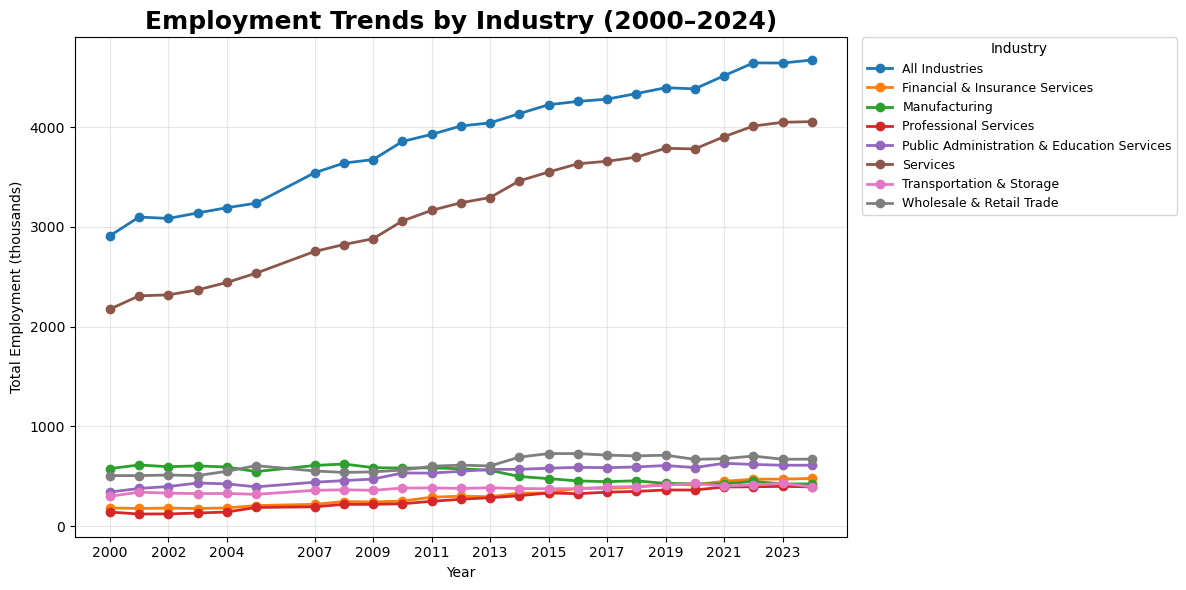

In [3]:

df["year"] = df["year"].astype(int)
df = df[df["year"].between(2000, 2024, inclusive="both")].copy()
df = df[df["year"] != 2006]

yi = (df.groupby(["year", "industry"], as_index=False)["employment"]
        .sum())

TOP_K = 8
top_ind = (yi.groupby("industry")["employment"].sum()
             .sort_values(ascending=False)
             .head(TOP_K).index)
yi_top = yi[yi["industry"].isin(top_ind)]

wide = yi_top.pivot(index="year", columns="industry", values="employment").sort_index()

plt.style.use("default") 
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

for col in wide.columns:
    ax.plot(wide.index, wide[col].values, marker="o", linewidth=2, label=col)

yr_min, yr_max = int(wide.index.min()), int(wide.index.max())
ax.set_title(f"Employment Trends by Industry ({yr_min}–{yr_max})", fontsize=18, weight="bold")
ax.set_ylabel("Total Employment (thousands)")
ax.set_xlabel("Year")
ax.grid(True, alpha=0.3)

years = wide.index.values
step = max(1, len(years) // 12)
shown_years = years[::step]
ax.set_xticks(shown_years)

ax.legend(title="Industry", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0., fontsize=9)

plt.tight_layout()
plt.show()

In the employment trends graph above, you can clearly see the changing between different industry.

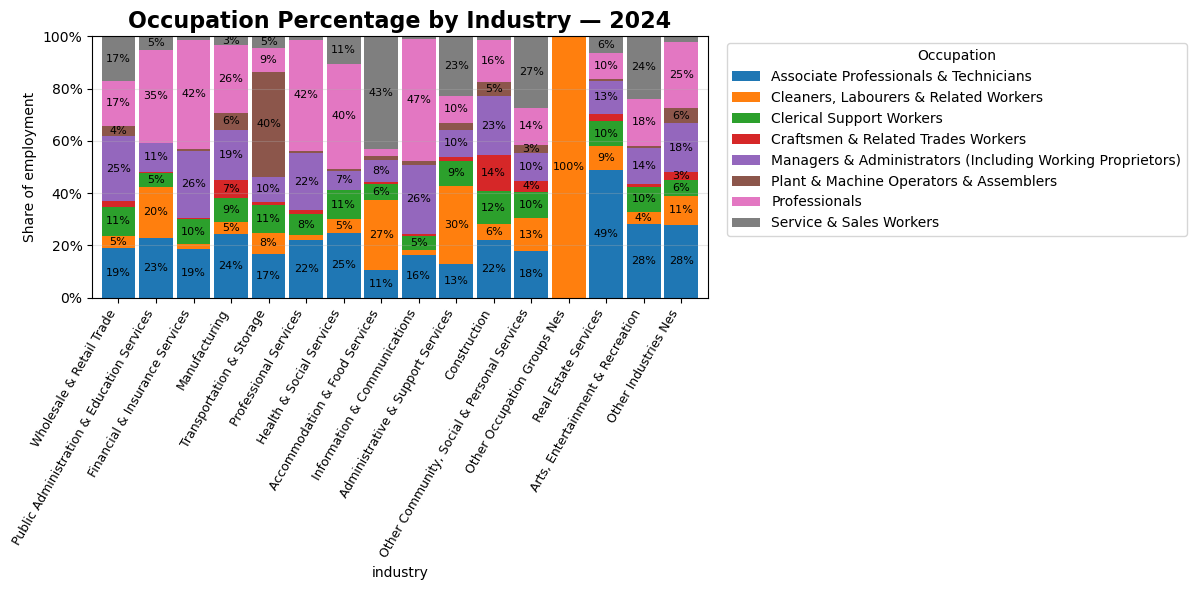

In [11]:

io = df_clean.groupby(["industry", "occupation"], as_index=False)["employment"].sum()

top_occ = io.groupby("occupation")["employment"].sum().nlargest(TOP_K).index
io["occ_slim"] = np.where(io["occupation"].isin(top_occ), io["occupation"], "Other")

wide = (io.groupby(["industry", "occ_slim"], as_index=False)["employment"].sum()
          .pivot(index="industry", columns="occ_slim", values="employment").fillna(0.0))
wide = wide.div(wide.sum(axis=1), axis=0)

order_ind = df_clean.groupby("industry")["employment"].sum().sort_values(ascending=False).index
wide = wide.reindex(order_ind)

plt.style.use("default")
fig, ax = plt.subplots(figsize=(12, 6))
wide.plot(kind="bar", stacked=True, ax=ax, width=0.9)

THRESH = 0.03 # only label segments that are more than 3%
for container in ax.containers: # every rectangle bars
    heights = np.array([patch.get_height() for patch in container]) # get the proportion of height for each bars inside the big bar
    labels = np.where(heights >= THRESH,
                      [f"{h*100:.0f}%" for h in heights],
                      "") # label the portion if it's larger than 3% of the whole bar
    ax.bar_label(container, labels=labels, label_type="center", fontsize=8,color="black")


ax.set_title("Occupation Percentage by Industry — 2024", fontsize=16, weight="bold")
ax.set_ylabel("Share of employment")
ax.set_xticklabels(wide.index, rotation=60, ha="right", fontsize=9)
ax.set_ylim(0, 1.0)
ticks = np.linspace(0, 1.0, 6)
ax.set_yticks(ticks)
ax.set_yticklabels([f"{t*100:.0f}%" for t in ticks])
ax.grid(axis="y", alpha=0.3)
ax.legend(title="Occupation", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In this graph you can see the percentage of different occupation in different industry